# Feature engineering

This notebook creates features that we will be using for modelling.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils.feature_engineering import *

In [2]:
# Load all data
portfolio = pd.read_csv('./data/final/portfolio.csv')
transaction_frame = pd.read_csv('./data/final/transaction_frame.csv')
profile = pd.read_csv('./data/final/profile.csv')

## 1. Profile data

Since genders are currently encoded as `M`, `F`, and `O`, they need to be encoded

In [3]:
# Binary encode gender
profile_gender_encoded = onehot_encode_feature(profile, 'gender')

In [4]:
profile_gender_encoded

,age,person,income,M,O
0,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0
1,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0
2,68.0,e2127556f4f64592b11af22de27a7932,70000.0,1,0
3,65.0,389bc3fa690240e798340f5a15918d5c,53000.0,1,0
4,58.0,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1,0
...,...,...,...,...,...
14820,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,0,0
14821,61.0,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,1,0
14822,49.0,01d26f638c274aa0b965d24cefe3183f,73000.0,1,0
14823,83.0,9dc1421481194dcd9400aec7c9ae6366,50000.0,0,0


## 2. Transaction data

Remove customer identified as outliers from the dataset

In [5]:
# Remove outlier customers
transaction_frame = remove_outlier_customer(transaction_frame)

In [6]:
# Merge all
features = merge_all_data(transaction_frame, portfolio, profile_gender_encoded)

In [7]:
# Add median spending
features = add_median_spending(features)

In [8]:
features

,person,amount,reward,difficulty,duration,email,mobile,social,web,discount,informational,age,income,M,O,median_spending
0,78afa995795e4d85b5d9ceeca43f5fef,19.89,5.0,5.0,168.0,1.0,1.0,0.0,1.0,0.0,0.0,75.0,100000.0,0,0,21.72
1,78afa995795e4d85b5d9ceeca43f5fef,17.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,100000.0,0,0,21.72
2,78afa995795e4d85b5d9ceeca43f5fef,19.67,0.0,0.0,72.0,1.0,1.0,1.0,0.0,0.0,1.0,75.0,100000.0,0,0,21.72
3,78afa995795e4d85b5d9ceeca43f5fef,29.72,0.0,0.0,72.0,1.0,1.0,1.0,0.0,0.0,1.0,75.0,100000.0,0,0,21.72
4,78afa995795e4d85b5d9ceeca43f5fef,23.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,100000.0,0,0,21.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126801,47683732768a4f7db7abb710ca22e66e,7.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,56000.0,1,0,7.10
126802,3873fe915496482eb589fa316ae7b0db,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,57000.0,1,0,1.57
126803,3873fe915496482eb589fa316ae7b0db,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,57000.0,1,0,1.57
126804,3873fe915496482eb589fa316ae7b0db,2.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,57000.0,1,0,1.57


## 3. Correlation analysis

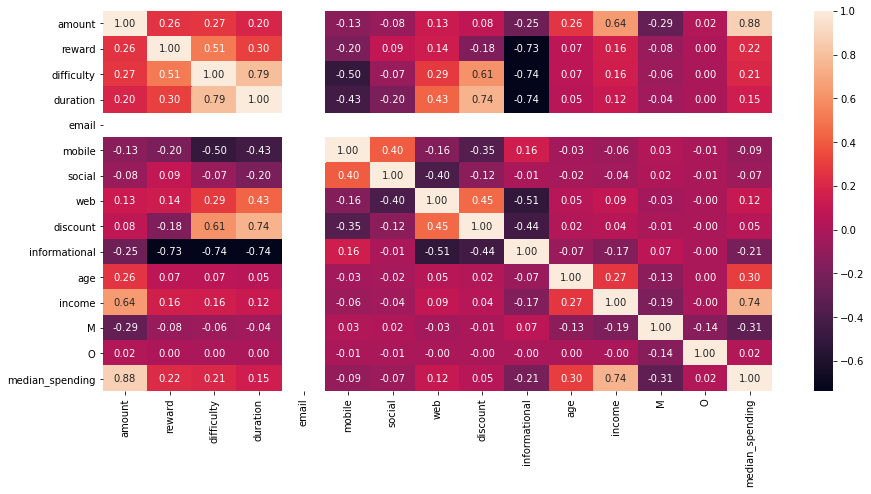

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(features.corr(method='spearman'), cbar=True, fmt='.2f', annot=True)
plt.show()

In [10]:
features.drop('email', axis=1, inplace=True)

## 4. Feature engineering
### 4.1. XGBoost

In [11]:
features_xgb, _ = label_encode_feature(features, 'person', encoder=None)

### 4.2. Linear Regression

In [12]:
features_lr = features.drop(['person', 'median_spending'], axis=1)

In [13]:
features_lr.to_csv('./data/final/features_lr.csv', index=False)
features_xgb.to_csv('./data/final/features_xgb.csv', index=False)